# 01 - Tuples as Data Structures

The first important thing to know about tuples, besides the fact that they're immutable strings, is that they're data records; the positions of values in a tuple have a meaning. Because they're immutable, this prevents the 1st element from ending up in the 2nd position, for example. This makes tuples more similar to strings than lists. They both have fixed order and fixed length. We can't do in-place sorts or in-place reversals (without creating a new tuple). 

This is why in maths we use tuples to represent coordinates: (x,y). Each position has an underlying meaning so the data has a **structure**.

Tuples are often **heterogeneous** which means that each element is of a different type, while lists are often **homogeneous** - this is because we often perform the same function as we iterate through a list without any consideration to its type. 

Here's an example:

In [74]:
london = 'London', 'UK', 8_780_000
new_york = 'New York', 'USA', 8_500_000
beijing = 'Beijing', 'China', 21_000_000

cities = london, new_york, beijing # this is a tuple.
list(cities)

[('London', 'UK', 8780000),
 ('New York', 'USA', 8500000),
 ('Beijing', 'China', 21000000)]

If we wanted to find the total population of all these cities, what would be the Pythonic way? We want to avoid using standard loops and instead prefer list comprehensions.

In [75]:
sum([city[2] for city in cities]) # We don't need the square brackets because, without them, we create a generator expression which can still be summed over.

38280000

Don't forget that you can unpack a bunch of values from a tuple using `*`. It's also convention to use `_` as the variable name for the values we don't care about.

In [76]:
a, b, *_, d = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
print(a, b, _, d)

1 2 [3, 4, 5, 6, 7, 8, 9] 10


# 02 - Named Tuples

Let's say we have a tuple of stock data which contains 10 elements, the last 2 of which are the highest and lowest price. If we wanted to calculate the difference between them, it would look something like: `stock_data[9] - stock_data[8]`. This is clearly unintuitive. 

We can use classes where we initialise all these values with appropriate attribute names such as `stock_data.high` and `stock_data.low`, but don't forget that objects are mutable - we can change their attributes - and we may not want this.

We want the best of both worlds - enter **Named Tuples** imported using `from collections import namedtuple`.

The ``namedtuple`` function in ``collections`` allows us to create a tuple that also has names attached to each field (aka property). This can be handy to reference data in the tuple structure by name instead of just relying on position.

The **``namedtuple`` function is basically a class factory** that creates a new type of class that uses a tuple as its underlying data storage (in fact, named tuples inherit from `tuple`), but layers in field names to each position and makes a property out of the field name.

The ``namedtuple`` function creates a **class**, and we then use that class to instantiate our instances of named tuples.

To use the `namedtuple` function we therefore need to select a class **name**, as well as indicate the **property** names, in the order in which they will be stored and accessed in the tuple.

Note that a `namedtuple`, like the regular `tuple` is an **immutable** data structure. (In fact, named tuples inherit from tuples - we'll revisit this in our section on metaclasses)

**The return value of a call to `namedtuple` is a class. The instance of a `namedtuple` class is a `tuple`.**

The fact that we assign a variable to the return of a function call makes `namedtuple` akin to when we assign a variable name to a lambda function.

<img src=attachment:19d0f6ff-03e3-4f34-b3ce-63304dda98ea.png width=500 />
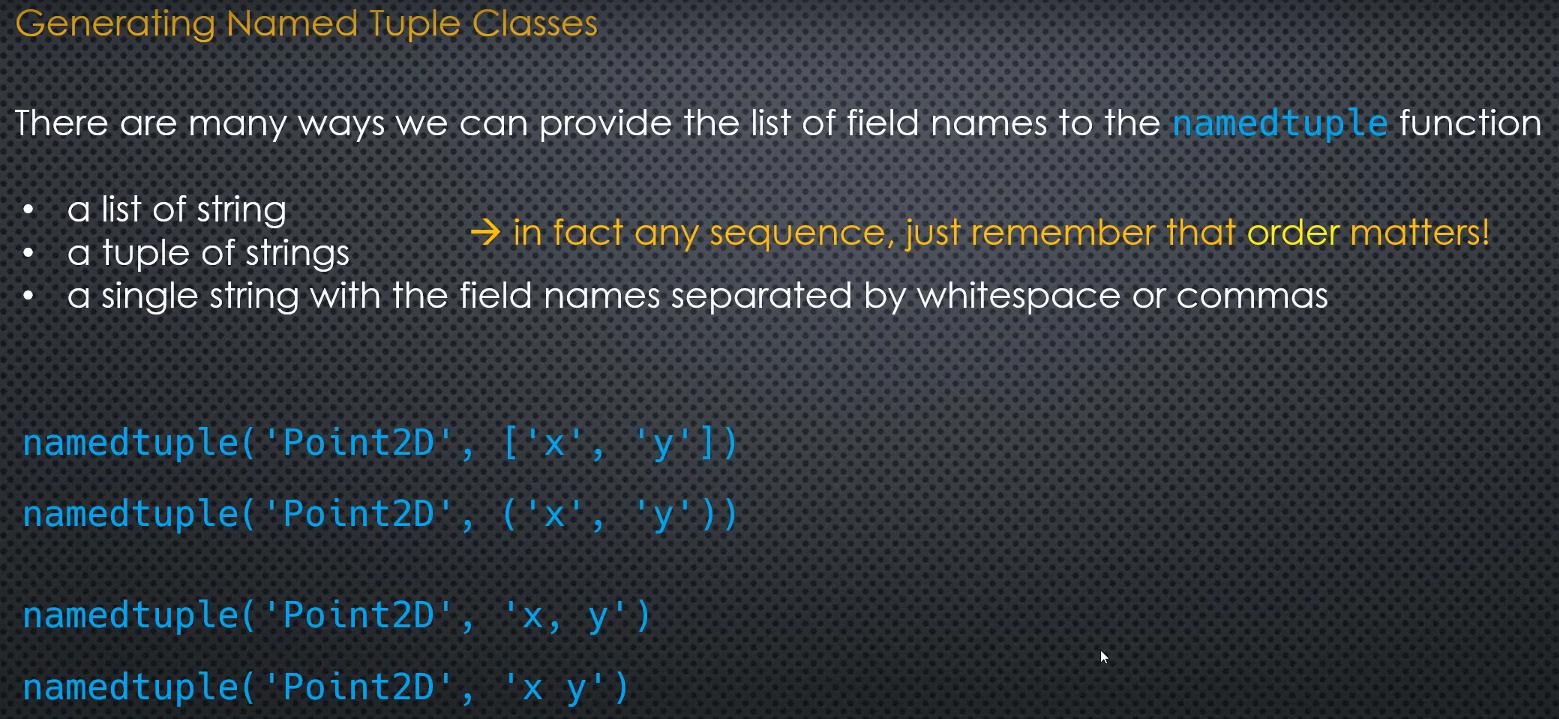

If you find yourself writing code such as:

In [77]:
class Point3D:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

Forget it! You seriously need to use named tuples! Not only can you shorten the amount of code you need to write, but you get some additional functionality for "free", such as `__repr__` and `__eq__` that you do not have to implement yourself!

In [78]:
from collections import namedtuple

Point2D = namedtuple('Point2D', ('x', 'y'))

pt1 = Point2D(10, 20)

pt1 # It accesses 'Point2D' from within namedtuple, not from our LHS assignment to Point2D.

Point2D(x=10, y=20)

In [79]:
print(type(Point2D)) # 'type' is a metaclass, of which classes are instances. Just as an ordinary object is an instance of a class, 
                     #  any class in Python 3, is an instance of the type metaclass.

print(isinstance(pt1, tuple)) 
print(type(pt1))     #  So, although pt1 inherits from 'tuple', all named tuples are honest to goodness **classes**, just as if you had used a `class` definition

<class 'type'>
True
<class '__main__.Point2D'>


Because `named tuples` inherit from `tuple`, operations that work well on tuples, such as `tuple1 == tuple2`, will work aswell on named tuples. This is because the import has already taken care of all the dunder methods such as `__repr__` and `__eq__`.

# 03 - Named Tuples - Modifying, Extending

**Modification**: By definition they are immutable, but we can modify it by creating a new tuple, just like how we concatenate strings to "modify" it. But, it's very clunky and tedious if we have many elements in the tuple. There are various other ways like slicing and unpacking but those will also have drawbacks. The best way is to use `namedtuple`'s bespoke method called `_replace`. All you do is pass in the keyword arguments equated to what they should be.

In [80]:
from collections import namedtuple

Stock = namedtuple('Stock', 'symbol year month day open high low close')

djia = Stock('DJIA', 2018, 1, 25, 26_313, 26_458, 26_260, 26_393) # let's change the year from 2018 to 2019 and the day from 25 to 26.

djia5 = djia._replace(year=2019, day=26)

djia5 #This has a new ID of course because tuples are immutables.

Stock(symbol='DJIA', year=2019, month=1, day=26, open=26313, high=26458, low=26260, close=26393)

**Extending Named Tuples**: Sometimes we may want to add one or more properties to an existing class without modifying the code for the custom class itself.

Using inheritance is one way to go about it so you may be tempted to do this with named tuples as well, but it's not easy, and there's a cleaner way to do this if all you're after is additional data fields.

Suppose we want to create a new class, say `StockExt`. We can leverage that `_fields` property. Remember that the `namedtuple` initializer can handle a list or tuple containing the field names. For example, the one we just retrieved from `_fields`. Now all we need to do is create a new tuple that contains those fields along with whatever extras we want:

In [81]:
new_fields = Stock._fields + ('previous_close',)
StockExt = namedtuple('StockExt', new_fields)

Now, with this newly extended class, we may want to take one of the "old" named tuple instance (`djia`) and create the extended version of it using the `StockExt` class.

This is also quite simple to do, since named tuples are tuples, and can therefore be unpacked in the arguments of a function call.

In [82]:
print(djia)
djia_ext = StockExt(*djia, 25_000) # unpacking all the items in the tuple into the class' argument
print(djia_ext)

Stock(symbol='DJIA', year=2018, month=1, day=25, open=26313, high=26458, low=26260, close=26393)
StockExt(symbol='DJIA', year=2018, month=1, day=25, open=26313, high=26458, low=26260, close=26393, previous_close=25000)


# 04 - Named Tuples - Docstrings, DefaultValues

**Docstrings**: This is easily done with `__doc__`.

In [83]:
from collections import namedtuple
Point2D = namedtuple('Point2D', 'x y')

Point2D.__doc__ = 'Represents a 2D Cartesian coordinate'  # We can add docstrings to the class

Point2D.x.__doc__ = 'x-coordinate' # as well as the attributes 
Point2D.y.__doc__ = 'y-coordinate'

In [ ]:
help(Point2D) # this is how we access the docstrings

**Adding Default Values to Named Tuples**: In Python the default values for a function's parameters are stored as a tuple in the `__defaults__` attribute.

In [84]:
def func(a, b=20, c=30):
    pass
    
func.__defaults__

(20, 30)

The `__defaults__` property is writable:

In [85]:
func.__defaults__ = (200, 300)

This is infact where Python reads the default parameters for a function. If we change them, then they will be changed in the function too.

In this case, the function we are interested in specifying default values for, is the named tuple class constructor, i.e. `__new__`.

So, we will simply need to set `Vector.__new__.__defaults__` to the desired tuple of default values.

The only thing to note is that if you specify less default values (say `m` values) than the total number of arguments (say `n` values, where `m < n`), then the defaults will apply to the **last** `m` values. Think of it as writing out your field names and default values on two lines, and right-aligning them. (If you specify more, then the values at the beginning are effectively ignored.)

In [86]:
Vector = namedtuple('Vector', 'x1 y1 x2 y2 origin_x origin_y')
Vector.__new__.__defaults__ = (0, 0) # This will set default values for 'origin_x' and 'origin_y'

v2 = Vector(5, 5, 20, 20) # the last 2 are taken from the defaults only if they're not provided, otherwise they're overwritten.
v2

Vector(x1=5, y1=5, x2=20, y2=20, origin_x=0, origin_y=0)

**Python 3.7 update**: Now you can specify defaults using the keyword parameter `defaults`. It will still apply to the rightmost parameters.

In [87]:
Vector = namedtuple('Vector', 'x1 y1 x2 y2 origin_x origin_y', defaults=(0, 0)) #  This will set default values for 'origin_x' and 'origin_y' to 0.
v3 = Vector(5, 5, 20, 20)
v3

Vector(x1=5, y1=5, x2=20, y2=20, origin_x=0, origin_y=0)

# 05 - Named Tuples - Application - Alternative to Dictionaries

First an important caveat: all this really only works for dictionaries with **string** keys. Dictionary keys can be other hashable data types, (including tuples, as long as they contain hashable types in turn), and these examples will not work with those types of dictionaries.

In [88]:
from collections import namedtuple

data_dict = dict(key1=100, key2=200, key3=300) # Here's a dictionary that we want to convert to a named tuple.

Data = namedtuple('Data', data_dict.keys()) # `data_dict.keys()` is actually an iterable. If it wasn't an iterable and instead a normal tuple, 
                                            # we would have to unpack it using *data_dict.keys().
    

To create the tuple, we should unpack the dictionary itself (`**`), resulting in keyword arguments that will be passed to the `Data` constructor. This is better than unpacking the values (see below) because `data_dict` may have the keys presented in an awkward order, and unpacking will assign them positionally.

In [89]:
d1 = Data(*data_dict.values()) # Bad way; it will pass '(100, 200, 300)` to the 1st, 2nd and 3rd parameter of the namedtuple class, respectively.

d2 = Data(**data_dict) # Good way; it will past 100 to key1, 200 to key2 and 300 to key3.
d2

Data(key1=100, key2=200, key3=300)

So, the pattern to create a named tuple out of a single dictionary is straightforward:

For any dictionary `d` we can created a named tuple class and insert the data into it as follows:

`1. Struct = namedtuple('Struct', d.keys())`

`2. data = Struct(**d)`

How do we get a particular key if the key name is stored as a variable e.g. `some_key = 'key1'`. We can't call `d2.some_key` because there is no attribute called `some_key` - only `key1`,`key2`, `key3`. We have to use `getattr(<tuple_name>, <variable_name>)`.

In [90]:
some_key = 'key2'
getattr(d2, some_key)

200

This is akin to the `.get` method for dictionaries.

In [91]:
data_dict.get(some_key)

200

In cases where you have a collection of dictionaries that share a common set of keys, this can be really useful, as long as you are willing to live with the fact that you now have immutable structures.

Let's suppose we have this data list of 4 dictionaries that we want to convert into 4 named tuples.

In [92]:
data_list = [
    {'key2': 2, 'key1': 1},
    {'key1': 3, 'key2': 4},
    {'key1': 5, 'key2': 6, 'key3': 7},
    {'key2': 100}
]

How do we find all unique keys present in each dictionary? We could use 2 `for` loops:

In [93]:
keys = set()
for d in data_list:
    for key in d.keys():
        keys.add(key)

But actually a more efficient way would be to use a comprehension:

In [94]:
keys = {key for dict_ in data_list for key in dict_.keys()}
keys

{'key1', 'key2', 'key3'}

In fact, we can also use the fact that we can union multiple sets (we'll cover this in detail later) by unpacking all the keys and creating a union of them:

In [95]:
keys = set().union(*(dict_.keys() for dict_ in data_list))
keys

{'key1', 'key2', 'key3'}

Let's create the class:

In [96]:
Struct = namedtuple('Struct', keys)

Now, it seems we're going to have a problem. Struct will always require 3 keys but some of our dictionaries have 2 or even 1 key - and the keys aren't ordered in each one. The solution: default values. We'll set all keys to `None` by default, and then when we iterate over the original dictionary, it will only update the keys that are passed in.

In [97]:
Struct = namedtuple('Struct', keys, defaults= (None,) * len(keys))
Struct.__new__.__defaults__

(None, None, None)

In [98]:
tuple_list = []
for dict_ in data_list:
    tuple_list.append(Struct(**dict_))

print(tuple_list)

[Struct(key3=None, key1=1, key2=2), Struct(key3=None, key1=3, key2=4), Struct(key3=7, key1=5, key2=6), Struct(key3=None, key1=None, key2=100)]


In a more pythonic way, let's write a generic function that takes any dictionary, which may have repeated keys, and create a list of named tuples:

In [99]:
def tuplify(dicts):
    keys = {key for dict_ in dicts for key in dict_.keys()}
    Struct = namedtuple('Struct', sorted(keys), defaults = (None,) * len(keys)) # `sorted` is used so keys in our tuple are presented in alphabetical order
    
    tuple_list = [Struct(**dict_) for dict_ in dicts]
        
    return tuple_list

tuplify(data_list)

[Struct(key1=1, key2=2, key3=None),
 Struct(key1=3, key2=4, key3=None),
 Struct(key1=5, key2=6, key3=7),
 Struct(key1=None, key2=100, key3=None)]

# 06 - Named Tuples - Application - Returning Multiple Values

Not much to this section - just that it can be useful to return namedtuples from a function as opposed to our normal way of returning multiple values.

In [100]:
from collections import namedtuple

Color = namedtuple('Color', 'red green blue alpha')

def random_color():
    red = randint(0, 255)
    green = randint(0,255)
    blue = randint(0, 255)
    alpha = round(random(), 2)
    return Color(red, green, blue, alpha)

color = random_color()
color.red

160

**One final summary point:** If you find yourself creating dictionaries and you're only accessing the keys again and again without any sort of modification, use a named tuple. Additionally, if you find yourself creating classes with only an `__init__`, use named tuples instead - unless you need the mutability. Tuples are great for records of things.